In [1]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt
# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
data = {
    'job_title_short': ['CyberSecuirty','Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': ['',['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}
df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,CyberSecuirty,
1,Data Analyst,"[excel, sql, python]"
2,Data Scientist,"[python, r]"
3,Data Engineer,"[aws, python, airflow]"


In [3]:
df_exploded = df_skills.explode('job_skills')
df_exploded

,job_title_short,job_skills
0,CyberSecuirty,
1,Data Analyst,excel
1,Data Analyst,sql
1,Data Analyst,python
2,Data Scientist,python
2,Data Scientist,r
3,Data Engineer,aws
3,Data Engineer,python
3,Data Engineer,airflow


In [4]:
df_exploded.value_counts('job_skills')

job_skills
python     3
           1
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

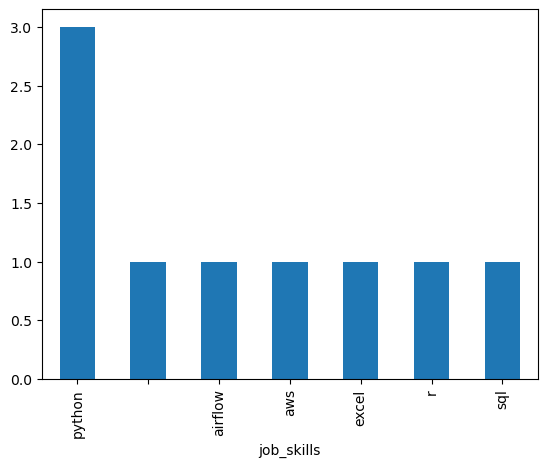

In [5]:
df_exploded.value_counts('job_skills').plot(kind='bar')


In [6]:
# Note : Any erorr click Restart
# Let's look at the literal_eval() function from the Python Standard Library ast module.    
# Turn str to list because list() not gonna work

import ast
def str_to_list(string):
    if pd.notna(string):
        return ast.literal_eval(string)
df['job_skills'] = df['job_skills'].apply(str_to_list)

# Note: Before run explode() make sure the input is a list not a string ⚠
df_exp = df.explode("job_skills")
df_exp

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


<Axes: title={'center': 'Top 10 Skills'}, xlabel='job_skills'>

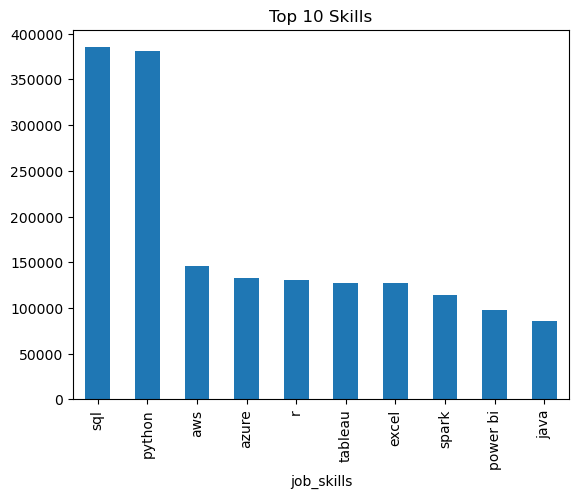

In [9]:
df_exp.value_counts('job_skills').head(10).plot(kind='bar', title='Top 10 Skills')